Sentiment Analysis on News Headlines

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [6]:
# Example data — replace with your real dataset
data = {
    'headline': [
        "Apple stock hits record high after earnings report",
        "Amazon faces antitrust lawsuit, shares drop",
        "Google announces breakthrough in AI technology",
        "Meta sees slow growth in ad revenue",
        "Microsoft beats quarterly earnings estimates",
        "Tesla stock falls amid production concerns"
    ]
}

df = pd.DataFrame(data)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each headline
df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify as Positive, Neutral, or Negative
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)

# Display the results
print(df)


                                            headline  sentiment  \
0  Apple stock hits record high after earnings re...     0.0000   
1        Amazon faces antitrust lawsuit, shares drop    -0.0258   
2     Google announces breakthrough in AI technology     0.0000   
3                Meta sees slow growth in ad revenue     0.3818   
4       Microsoft beats quarterly earnings estimates     0.0000   
5         Tesla stock falls amid production concerns     0.0000   

  sentiment_label  
0         Neutral  
1         Neutral  
2         Neutral  
3        Positive  
4         Neutral  
5         Neutral  


In [7]:
# Set seaborn style
sns.set(style="whitegrid")

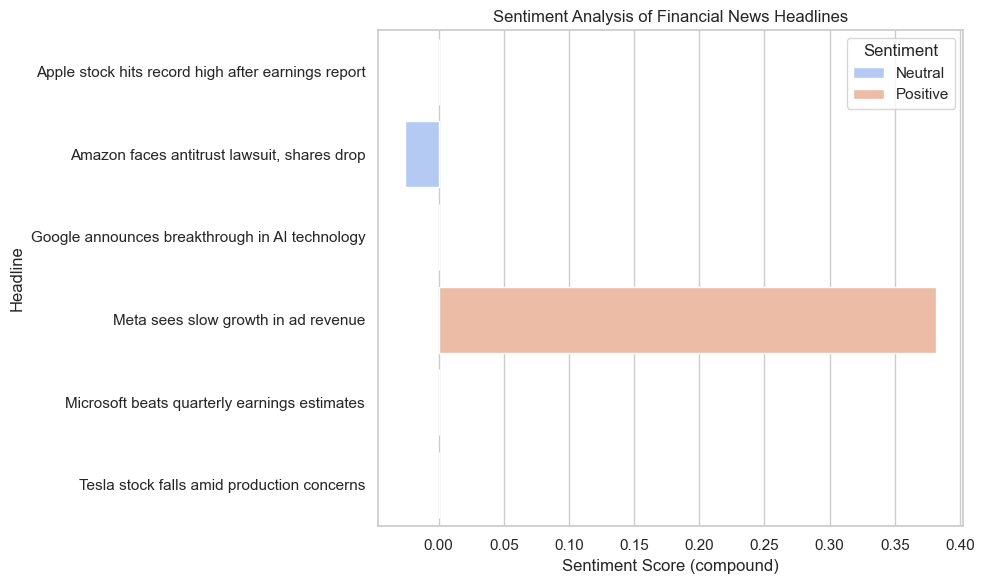

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='headline', data=df, hue='sentiment_label', dodge=False, palette='coolwarm')
plt.xlabel("Sentiment Score (compound)")
plt.ylabel("Headline")
plt.title("Sentiment Analysis of Financial News Headlines")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()